In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import thalesians.tsa.filtering as filtering
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

## Univariate geometric Brownian motion

In [4]:
X = proc.GeometricBrownianMotion()
x0 = .3

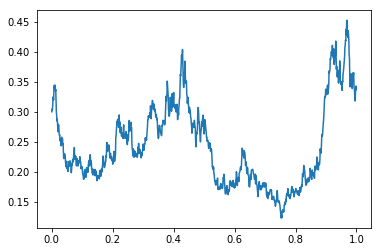

In [5]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
em = sim.EulerMaruyama(process=X, initial_value=x0, times=sim.xtimes(start=0., stop=1., step=1E-3))
df = sim.run(em)
plt.plot(df);

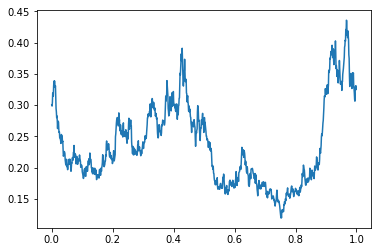

In [6]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
x = [x0]
ts = [0.]; xs = [x]
for t, v in zip(sim.xtimes(0., 1., 1E-3), rnd.multivatiate_normals(ndim=1)):
    x = X.propagate(t, v, ts[-1], x)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);

In [7]:
X = proc.WienerProcess()
x0 = .3

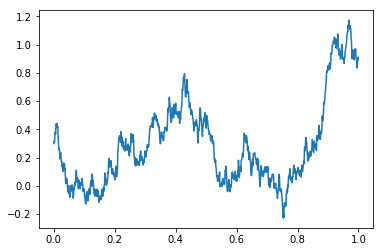

In [8]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
em = sim.EulerMaruyama(process=X, initial_value=x0, times=sim.xtimes(start=0., stop=1., step=1E-3))
df = sim.run(em)
plt.plot(df);

## Multivariate variance-scaled, correlated geometric Brownian motion with drift

In [9]:
X = proc.GeometricBrownianMotion.create_from_cov(mean=[3., 5.], cov=[[16., -8.], [-8., 16.]])
x0 = npu.col(7., 8.)

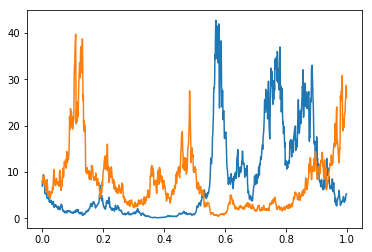

In [10]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
em = sim.EulerMaruyama(process=X, initial_value=x0, times=sim.xtimes(start=0., stop=1., step=1E-3))
df = sim.run(em)
plt.plot(df);

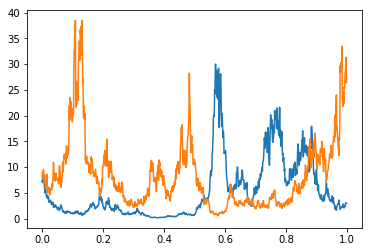

In [11]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
x = x0
ts = [0.]; xs = [x0.flatten()]
for t, v in zip(sim.xtimes(0., 1., 1E-3), rnd.multivatiate_normals(ndim=2)):
    x = X.propagate(t, v, ts[-1], x)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);